In [1]:
# Load packages
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats 
import os

In [2]:
EEG_PATH = "/srv/eeg_reconstruction/shared/biosemi-dataset/eeg2/preprocessed_eeg"

def getSubChannels(subject = "sub-01", split="test"):
    fpath = os.path.join(EEG_PATH, subject, f"preprocessed_eeg_{split}.npy")
    data = np.load(fpath, allow_pickle=True)
    ch_names = data['ch_names']
    return ch_names


def getSubEeg(subject = "sub-01", split="test"):
    print("Getting eeg data for", subject)
    fpath = os.path.join(EEG_PATH, subject, f"preprocessed_eeg_{split}.npy")
    # load EEGs
    data = np.load(fpath, allow_pickle=True)
    preprocessed_eeg_data = data['preprocessed_eeg_data']
    return np.array(preprocessed_eeg_data)

subjects = os.listdir(EEG_PATH)
eegData = np.array([getSubEeg(sub, "training") for sub in subjects])

channels = getSubChannels(subjects[0], "training")

Getting eeg data for sub-05
Getting eeg data for sub-06
Getting eeg data for sub-02
Getting eeg data for sub-03
Getting eeg data for sub-07
Getting eeg data for sub-04
Getting eeg data for sub-01
Getting eeg data for sub-08


In [3]:
# P1 ERP component, should have positive polarity
time_win = (.080, .140)
electrodes = ('O1', 'O2', 'PO7', 'PO8', 'Pz', 'P3', 'P4')
roi = [channels.index(e) for e in electrodes]

In [4]:
eegData.shape
# participants, classes, repetitions, channels, time steps

(8, 768, 4, 64, 308)

In [37]:
def plot_single_channel_erp(subEegData, channels, selected_channel_indices):
    imgEegData = np.mean(subEegData, axis=0)
    erp = np.mean(imgEegData, axis=0)
    data = erp
    
    plt.figure(figsize=(16,10))

    times = [
 -3.90625000e-04,  1.56250000e-03,  3.51562500e-03,  5.46875000e-03,
  7.42187500e-03,  9.37500000e-03,  1.13281250e-02,  1.32812500e-02,
  1.52343750e-02,  1.71875000e-02,  1.91406250e-02,  2.10937500e-02,
  2.30468750e-02,  2.50000000e-02,  2.69531250e-02,  2.89062500e-02,
  3.08593750e-02,  3.28125000e-02,  3.47656250e-02,  3.67187500e-02,
  3.86718750e-02,  4.06250000e-02,  4.25781250e-02,  4.45312500e-02,
  4.64843750e-02,  4.84375000e-02,  5.03906250e-02,  5.23437500e-02,
  5.42968750e-02,  5.62500000e-02,  5.82031250e-02,  6.01562500e-02,
  6.21093750e-02,  6.40625000e-02,  6.60156250e-02,  6.79687500e-02,
  6.99218750e-02,  7.18750000e-02,  7.38281250e-02,  7.57812500e-02,
  7.77343750e-02,  7.96875000e-02,  8.16406250e-02,  8.35937500e-02,
  8.55468750e-02,  8.75000000e-02,  8.94531250e-02,  9.14062500e-02,
  9.33593750e-02,  9.53125000e-02,  9.72656250e-02,  9.92187500e-02,
  1.01171875e-01,  1.03125000e-01,  1.05078125e-01,  1.07031250e-01,
  1.08984375e-01,  1.10937500e-01,  1.12890625e-01,  1.14843750e-01,
  1.16796875e-01,  1.18750000e-01,  1.20703125e-01,  1.22656250e-01,
  1.24609375e-01,  1.26562500e-01,  1.28515625e-01,  1.30468750e-01,
  1.32421875e-01,  1.34375000e-01,  1.36328125e-01,  1.38281250e-01,
  1.40234375e-01,  1.42187500e-01,  1.44140625e-01,  1.46093750e-01,
  1.48046875e-01,  1.50000000e-01,  1.51953125e-01,  1.53906250e-01,
  1.55859375e-01,  1.57812500e-01,  1.59765625e-01,  1.61718750e-01,
  1.63671875e-01,  1.65625000e-01,  1.67578125e-01,  1.69531250e-01,
  1.71484375e-01,  1.73437500e-01,  1.75390625e-01,  1.77343750e-01,
  1.79296875e-01,  1.81250000e-01,  1.83203125e-01,  1.85156250e-01,
  1.87109375e-01,  1.89062500e-01,  1.91015625e-01,  1.92968750e-01,
  1.94921875e-01,  1.96875000e-01,  1.98828125e-01,  2.00781250e-01,
  2.02734375e-01,  2.04687500e-01,  2.06640625e-01,  2.08593750e-01,
  2.10546875e-01,  2.12500000e-01,  2.14453125e-01,  2.16406250e-01,
  2.18359375e-01,  2.20312500e-01,  2.22265625e-01,  2.24218750e-01,
  2.26171875e-01,  2.28125000e-01,  2.30078125e-01,  2.32031250e-01,
  2.33984375e-01,  2.35937500e-01,  2.37890625e-01,  2.39843750e-01,
  2.41796875e-01,  2.43750000e-01,  2.45703125e-01,  2.47656250e-01,
  2.49609375e-01,  2.51562500e-01,  2.53515625e-01,  2.55468750e-01,
  2.57421875e-01,  2.59375000e-01,  2.61328125e-01,  2.63281250e-01,
  2.65234375e-01,  2.67187500e-01,  2.69140625e-01,  2.71093750e-01,
  2.73046875e-01,  2.75000000e-01,  2.76953125e-01,  2.78906250e-01,
  2.80859375e-01,  2.82812500e-01,  2.84765625e-01,  2.86718750e-01,
  2.88671875e-01,  2.90625000e-01,  2.92578125e-01,  2.94531250e-01,
  2.96484375e-01,  2.98437500e-01,  3.00390625e-01,  3.02343750e-01,
  3.04296875e-01,  3.06250000e-01,  3.08203125e-01,  3.10156250e-01,
  3.12109375e-01,  3.14062500e-01,  3.16015625e-01,  3.17968750e-01,
  3.19921875e-01,  3.21875000e-01,  3.23828125e-01,  3.25781250e-01,
  3.27734375e-01,  3.29687500e-01,  3.31640625e-01,  3.33593750e-01,
  3.35546875e-01,  3.37500000e-01,  3.39453125e-01,  3.41406250e-01,
  3.43359375e-01,  3.45312500e-01,  3.47265625e-01,  3.49218750e-01,
  3.51171875e-01,  3.53125000e-01,  3.55078125e-01,  3.57031250e-01,
  3.58984375e-01,  3.60937500e-01,  3.62890625e-01,  3.64843750e-01,
  3.66796875e-01,  3.68750000e-01,  3.70703125e-01,  3.72656250e-01,
  3.74609375e-01,  3.76562500e-01,  3.78515625e-01,  3.80468750e-01,
  3.82421875e-01,  3.84375000e-01,  3.86328125e-01,  3.88281250e-01,
  3.90234375e-01,  3.92187500e-01,  3.94140625e-01,  3.96093750e-01,
  3.98046875e-01,  4.00000000e-01,  4.01953125e-01,  4.03906250e-01,
  4.05859375e-01,  4.07812500e-01,  4.09765625e-01,  4.11718750e-01,
  4.13671875e-01,  4.15625000e-01,  4.17578125e-01,  4.19531250e-01,
  4.21484375e-01,  4.23437500e-01,  4.25390625e-01,  4.27343750e-01,
  4.29296875e-01,  4.31250000e-01,  4.33203125e-01,  4.35156250e-01,
  4.37109375e-01,  4.39062500e-01,  4.41015625e-01,  4.42968750e-01,
  4.44921875e-01,  4.46875000e-01,  4.48828125e-01,  4.50781250e-01,
  4.52734375e-01,  4.54687500e-01,  4.56640625e-01,  4.58593750e-01,
  4.60546875e-01,  4.62500000e-01,  4.64453125e-01,  4.66406250e-01,
  4.68359375e-01,  4.70312500e-01,  4.72265625e-01,  4.74218750e-01,
  4.76171875e-01,  4.78125000e-01,  4.80078125e-01,  4.82031250e-01,
  4.83984375e-01,  4.85937500e-01,  4.87890625e-01,  4.89843750e-01,
  4.91796875e-01,  4.93750000e-01,  4.95703125e-01,  4.97656250e-01,
  4.99609375e-01,  5.01562500e-01,  5.03515625e-01,  5.05468750e-01,
  5.07421875e-01,  5.09375000e-01,  5.11328125e-01,  5.13281250e-01,
  5.15234375e-01,  5.17187500e-01,  5.19140625e-01,  5.21093750e-01,
  5.23046875e-01,  5.25000000e-01,  5.26953125e-01,  5.28906250e-01,
  5.30859375e-01,  5.32812500e-01,  5.34765625e-01,  5.36718750e-01,
  5.38671875e-01,  5.40625000e-01,  5.42578125e-01,  5.44531250e-01,
  5.46484375e-01,  5.48437500e-01,  5.50390625e-01,  5.52343750e-01,
  5.54296875e-01,  5.56250000e-01,  5.58203125e-01,  5.60156250e-01,
  5.62109375e-01,  5.64062500e-01,  5.66015625e-01,  5.67968750e-01,
  5.69921875e-01,  5.71875000e-01,  5.73828125e-01,  5.75781250e-01,
  5.77734375e-01,  5.79687500e-01,  5.81640625e-01,  5.83593750e-01,
  5.85546875e-01,  5.87500000e-01,  5.89453125e-01,  5.91406250e-01,
  5.93359375e-01,  5.95312500e-01,  5.97265625e-01,  5.99218750e-01]

    for i in np.where(np.isin(channels, electrodes))[0]:
        plt.plot(times, data[i], label=channels[i])  # Plot each row as a separate line
        
    # Add labels and title
    plt.title("Processed Single-channel ERP (Averaged across conditions and repetitions)")
    plt.xlabel("Time (s)")
    plt.ylabel("Voltage")

    # Show legend
    plt.legend()

    # Display the plot
    plt.show()

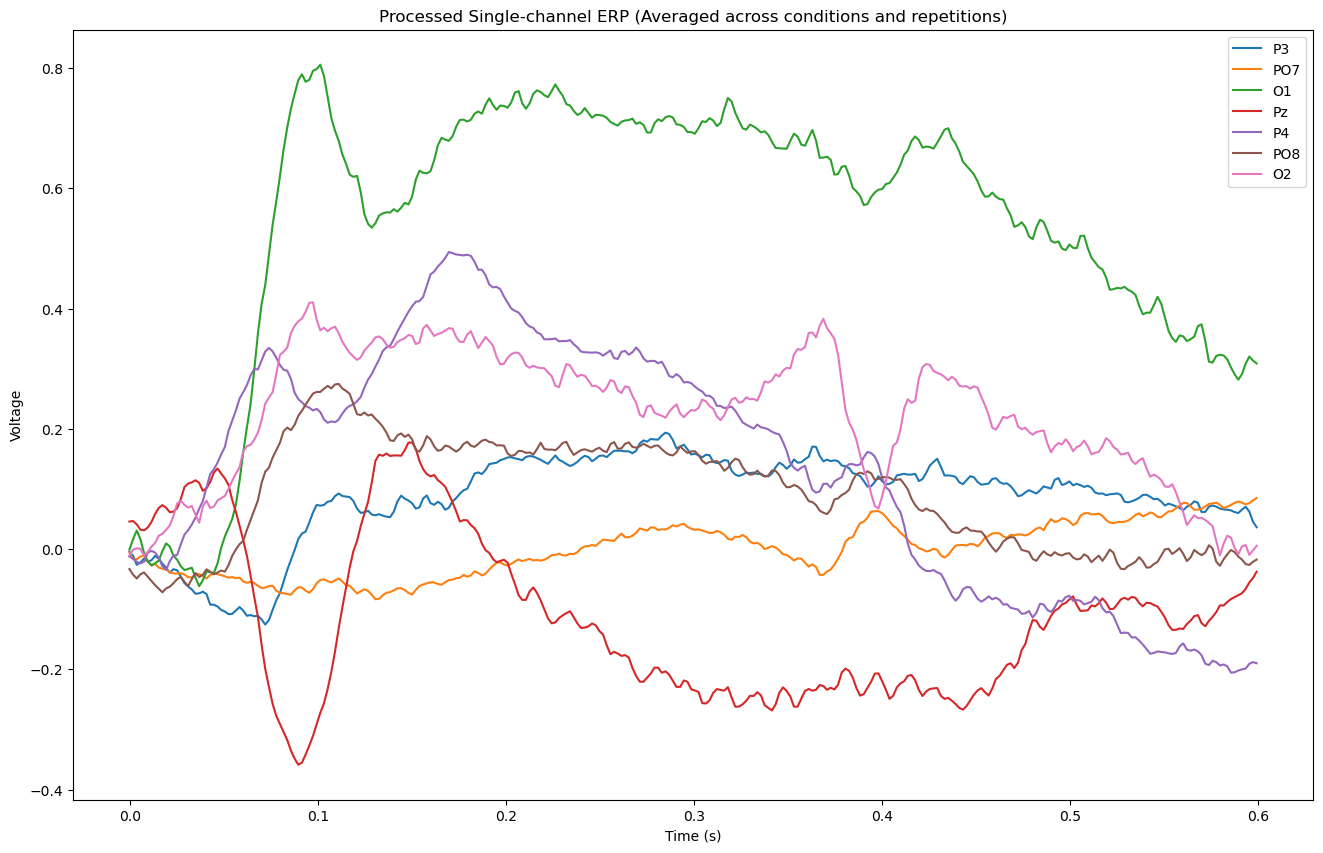

(8, 768, 4, 64, 308)

In [38]:
plot_single_channel_erp(eegData[0], channels, roi)
eegData.shape